# Image Classification with HOG Feature and Neural Networks

In [621]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

## 1. Dataset Preparation

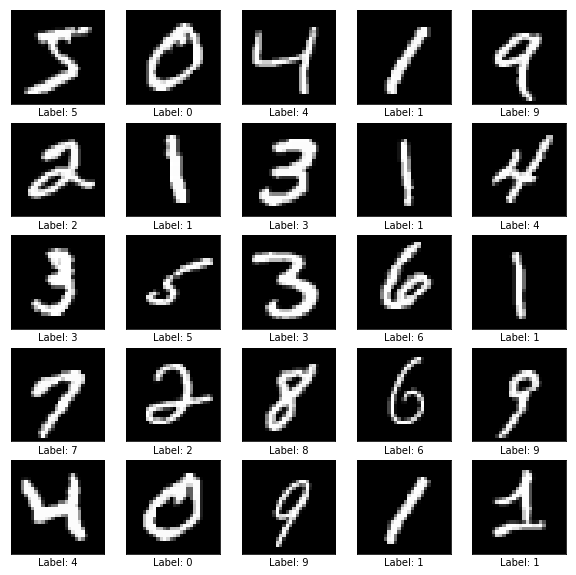

**Download MNIST dataset**

In [60]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P ../images/mnist-dataset

--2024-01-10 15:43:33--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9,5M) [application/x-gzip]
Saving to: '../images/mnist-dataset/train-images-idx3-ubyte.gz.1'

     0K .......... .......... .......... .......... ..........  0%  398M 0s
    50K .......... .......... .......... .......... ..........  1% 1,45M 3s
   100K .......... .......... .......... .......... ..........  1% 1,36M 4s
   150K .......... .......... .......... .......... ..........  2% 1,46M 5s
   200K .......... .......... .......... .......... ..........  2% 4,42M 4s
   250K .......... .......... .......... .......... ..........  3% 1,45M 5s
   300K .......... .......... .......... .......... ..........  3%  876K 5s
   350K .......... .......... .......... .......... ..........  4% 2,49M 5s

In [61]:
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P ../images/mnist-dataset

--2024-01-10 15:43:51--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: '../images/mnist-dataset/train-labels-idx1-ubyte.gz'

     0K .......... .......... ........                        100%  364M=0s

2024-01-10 15:43:51 (364 MB/s) - '../images/mnist-dataset/train-labels-idx1-ubyte.gz' saved [28881/28881]



In [62]:
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P ../images/mnist-dataset

--2024-01-10 15:44:00--  http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1648877 (1,6M) [application/x-gzip]
Saving to: '../images/mnist-dataset/t10k-images-idx3-ubyte.gz.1'

     0K .......... .......... .......... .......... ..........  3%  398M 0s
    50K .......... .......... .......... .......... ..........  6% 1,60M 0s
   100K .......... .......... .......... .......... ..........  9% 1,34M 1s
   150K .......... .......... .......... .......... .......... 12% 1,30M 1s
   200K .......... .......... .......... .......... .......... 15% 9,29M 1s
   250K .......... .......... .......... .......... .......... 18% 1,32M 1s
   300K .......... .......... .......... .......... .......... 21% 1,09M 1s
   350K .......... .......... .......... .......... .......... 24%  830K 1s
 

In [63]:
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P ../images/mnist-dataset

--2024-01-10 15:44:05--  http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4542 (4,4K) [application/x-gzip]
Saving to: '../images/mnist-dataset/t10k-labels-idx1-ubyte.gz.1'

     0K ....                                                  100%  102M=0s

2024-01-10 15:44:06 (102 MB/s) - '../images/mnist-dataset/t10k-labels-idx1-ubyte.gz.1' saved [4542/4542]



**Extract gzip file**

In [97]:
!gzip -d ../images/mnist-dataset/train-images-idx3-ubyte.gz 

In [30]:
!gzip -d ../images/mnist-dataset/train-labels-idx1-ubyte.gz

In [ ]:
!gzip -d ../images/mnist-dataset/t10k-images-idx3-ubyte.gz

In [ ]:
!gzip -d ../images/mnist-dataset/t10k-labels-idx1-ubyte.gz

In [105]:
!ls ../images/mnist-dataset/

**Load image dataset**

In [622]:
train_images, train_labels = loadlocal_mnist(images_path='./images/mnist-dataset/train-images.idx3-ubyte',
                                             labels_path='./images/mnist-dataset/train-labels.idx1-ubyte')

In [623]:
test_images, test_labels = loadlocal_mnist(images_path='./images/mnist-dataset/t10k-images.idx3-ubyte',
                                             labels_path='./images/mnist-dataset/t10k-labels.idx1-ubyte')

In [624]:
img1=1
img2=2

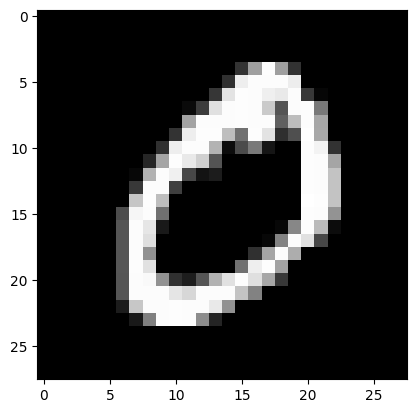

In [625]:
plt.imshow(train_images[img1].reshape(28,28), cmap='gray')

In [626]:
train_labels[img1]

0

**Test extract HOG feature from image**

In [627]:
feature, hog_img = hog(train_images[img1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [628]:
feature.shape

(144,)

<BarContainer object of 144 artists>

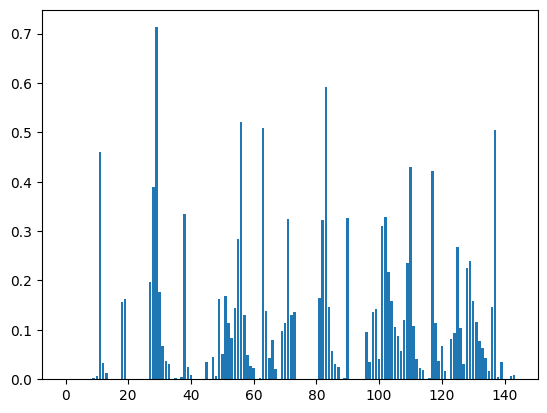

In [629]:
plt.bar(list(range(feature.shape[0])), feature)

In [630]:
feature, hog_img = hog(train_images[img2].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

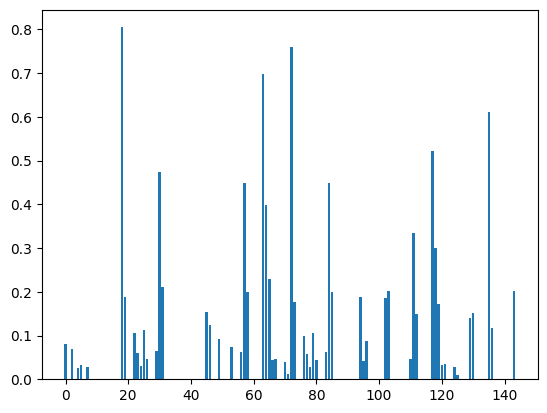

In [631]:
plt.bar(list(range(feature.shape[0])), feature)

## 2. Preprocessing using HOG Feature Extraction

In [632]:
n_dims = feature.shape[0]

In [633]:
n_dims

144

In [634]:
n_samples = train_images.shape[0]

In [635]:
n_samples

60000

**Create variable for dataset**

In [636]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [637]:
X_train.shape

(60000, 144)

**Get HOG feature from each image & put into dataset variable**

In [638]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

**Convert categorical label to one hot label**

In [540]:
from sklearn.preprocessing import LabelBinarizer

In [541]:
lb = LabelBinarizer()

In [542]:
lb.fit(y_train)

LabelBinarizer()

In [543]:
y_train_one_hot = lb.transform(y_train)

In [593]:
y_train_one_hot[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [545]:
y_train[img1]

2

In [546]:
import numpy as np

In [560]:
label = lb.inverse_transform(np.array([y_train_one_hot[img1]]))

In [561]:
label[0]

2

## 3. Classification with Neural Networks

In [403]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=100)

In [404]:
clf.fit(X_train, y_train_one_hot)

C:\Users\MUHD ILHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64, 10), max_iter=100, solver='sgd')

## 3.1 Classification with SVM

In [549]:
clf = SVC(max_iter=100)

In [554]:
clf.fit(X_train, y_train)

C:\Users\MUHD ILHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=100, gamma=0.001, max_iter=100)

## 4. Predict Test Dataset 

In [651]:
n_samples = test_images.shape[0]

In [652]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [650]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

IndexError: index 10000 is out of bounds for axis 0 with size 10000

In [594]:
y_test_one_hot = lb.transform(y_test)

In [595]:
y_pred_one_hot = clf.predict(X_test)

In [591]:
y_pred[0]

7

In [639]:
img1 = 7

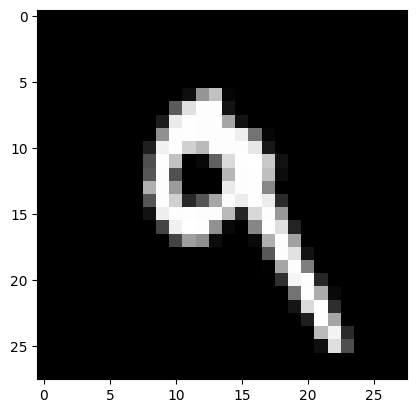

In [640]:
plt.imshow(test_images[img1].reshape(28,28), cmap='gray')

In [641]:
out_one_hot = clf.predict(X_test[img1].reshape(1, n_dims))

In [642]:
out_one_hot

array([9])

In [643]:
out_one_hot[0]

9

## 5. Evaluation Metrics

### 5. 1 Confussion Matrix

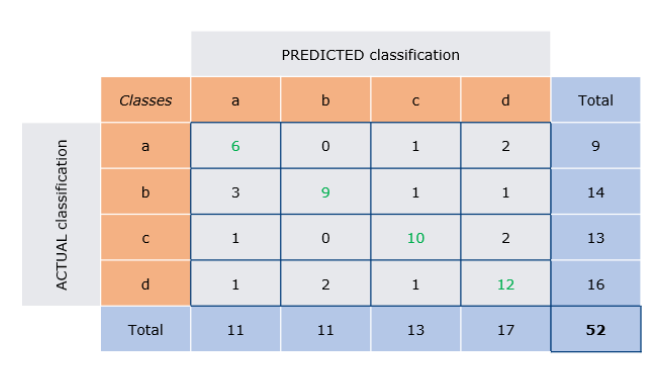

In [644]:
from sklearn.metrics import confusion_matrix

In [645]:
conf_mat = confusion_matrix(y_test, y_pred)

In [646]:
conf_mat

array([[ 975,    1,    0,    2,    1,    0,    1,    0,    0,    0],
       [  14, 1115,    4,    0,    1,    0,    1,    0,    0,    0],
       [  34,    4,  980,    4,    0,    0,    1,    8,    0,    1],
       [  25,    0,   13,  956,    0,    5,    0,    4,    2,    5],
       [  40,   10,    0,    0,  914,    0,    6,    5,    1,    6],
       [  30,    0,    2,    9,    2,  842,    1,    1,    5,    0],
       [  24,    1,    2,    0,    6,    8,  917,    0,    0,    0],
       [  32,    2,   26,    5,   10,    1,    0,  941,    3,    8],
       [  52,    1,    2,    6,    1,    5,    3,    4,  893,    7],
       [  44,    0,    0,    1,   12,    2,    0,    8,    9,  933]],
      dtype=int64)

In [647]:
from mlxtend.plotting import plot_confusion_matrix

In [648]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

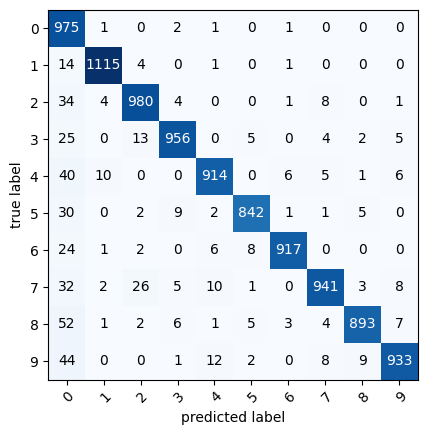

In [649]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

### 5.2 Precission

$$\text { Precision }=\frac{T P}{T P+F P}$$

In [456]:
from sklearn.metrics import precision_score

In [457]:
precision = precision_score(y_test, y_pred, average=None)

In [458]:
precision

array([0.76771654, 0.98324515, 0.95238095, 0.97253306, 0.96515312,
       0.97566628, 0.98602151, 0.96910402, 0.97809419, 0.971875  ])

### 5.3 Recall

$$\text { Recall }=\frac{T P}{T P+F N}$$

In [459]:
from sklearn.metrics import recall_score

In [460]:
recall = recall_score(y_test, y_pred, average=None)

In [461]:
recall

array([0.99489796, 0.98237885, 0.9496124 , 0.94653465, 0.93075356,
       0.94394619, 0.95720251, 0.91536965, 0.91683778, 0.9246779 ])

### 5.4 Accuracy

$$\text { Accuracy }=\frac{T P+T N}{T P+T N+F P+F N}$$

In [462]:
from sklearn.metrics import accuracy_score

In [463]:
accuracy = accuracy_score(y_test, y_pred)

In [464]:
accuracy

0.9466

### 5.5 F1-Score

$$\text { F1-Score }=\left(\frac{2}{\text { precision }^{-1}+\text { recall }^{-1}}\right)=2 \cdot\left(\frac{\text { precision } \cdot \text { recall }}{\text { precision }+\text { recall }}\right)$$

In [465]:
from sklearn.metrics import f1_score

In [466]:
f1 = f1_score(y_test, y_pred, average='macro')

In [467]:
f1

0.947405042783393